In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
              
 #parameters 
m = 1                                               #m=sqrt(x**2+y**2+(z/q)**2)
n = 4                                               #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
r_0 = 500                                           #characteristic radius

 #integrate
f = lambda x: (np.exp(-np.power(x/r_0, (1/n))))*(np.power(x/r_0, ((1/n)-1)))/(np.sqrt((x**2)-(m**2)));
I = quad(f, m, np.inf)

print(I)


(154.20756336891606, 1.0077275192088564e-07)


In [2]:
g = lambda m: quad(f, m, np.inf)[0]
print(g(1))

154.20756336891606


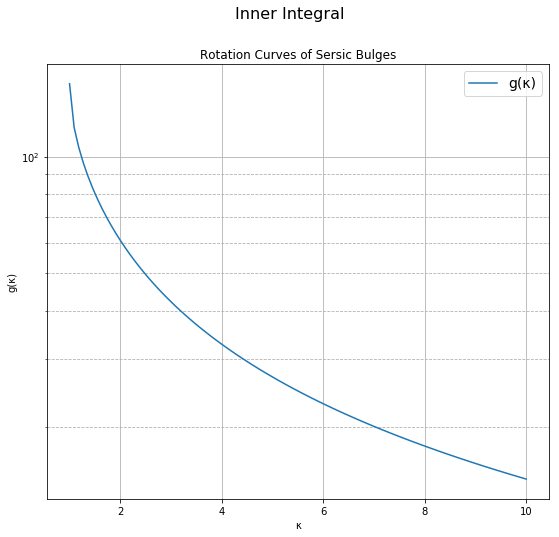

In [3]:
#adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                     #x from/to and line smoothness
gv = np.vectorize(g)

 #functions
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [4]:
 #parameters
I_0 = 8e9                                           #central surface brightness 
G = 6.67408e-11                                     #gravitational constant
gam = 1                                             #mass-to-light ratio
q = 0.5                                             #intrinsic axis ratio
i = 40                                              #inclination angle

#equations
C = (4*G*q*gam*I_0)/(r_0*n)*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)

h = lambda r: C*g(r)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))
l = lambda x: quad(h, 1, x)[0]

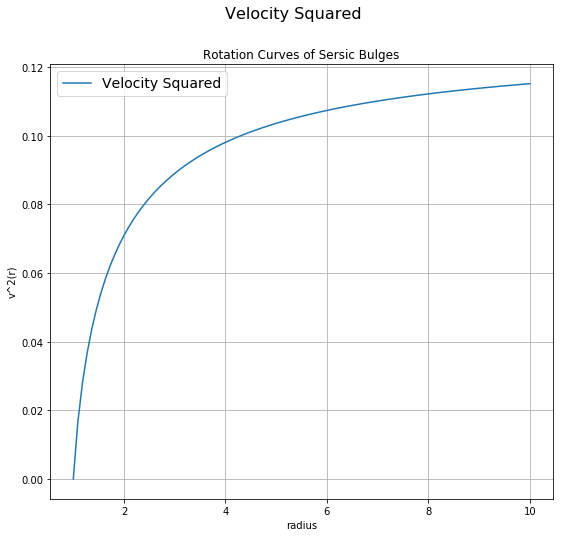

In [5]:
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

x = np.linspace(1, 10, 100)                     #x from/to and line smoothness
lv = np.vectorize(l)

 #functions
plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

plt.legend(fontsize=14);                                      #adding legend
plt.show()

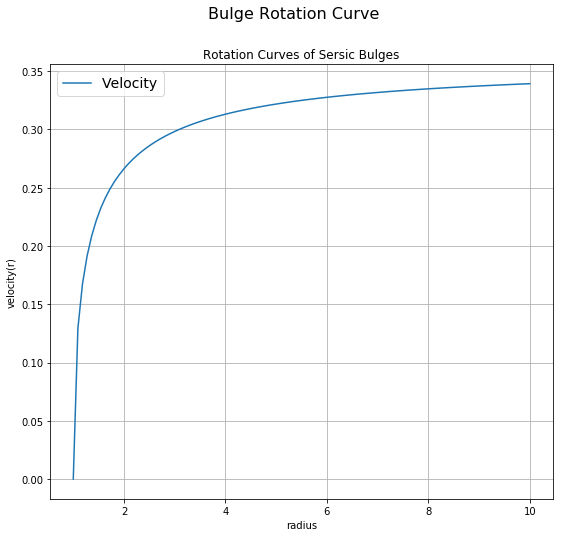

In [6]:
v = lambda x: np.sqrt(l(x))

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

x = np.linspace(1, 10, 100)                     #x from/to and line smoothness
vv = np.vectorize(v)

 #functions
plt.plot(x, vv(x), linestyle='solid', label='Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Bulge Rotation Curve', fontsize=16)
ax3.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax3.set(xlabel='radius', ylabel='velocity(r)');

plt.legend(fontsize=14);                                      #adding legend
plt.show()